In [1]:
# # load libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline

In [19]:
# # read data
# Read datas
median_house_hold_in_come = pd.read_csv('../data/MedianHouseholdIncome2015.csv', encoding="windows-1252")
percentage_people_below_poverty_level = pd.read_csv('../data/PercentagePeopleBelowPovertyLevel.csv', encoding="windows-1252")
percent_over_25_completed_highSchool = pd.read_csv('../data/PercentOver25CompletedHighSchool.csv', encoding="windows-1252")
share_race_city = pd.read_csv('../data/ShareRaceByCity.csv', encoding="windows-1252")
kill = pd.read_csv('../data/PoliceKillingsUS.csv', encoding="windows-1252")

***
### 1. Bar Graph: Poverty rate of each city

In [20]:
percentage_people_below_poverty_level.head()

,Geographic Area,City,poverty_rate
0,AL,Abanda CDP,78.8
1,AL,Abbeville city,29.1
2,AL,Adamsville city,25.5
3,AL,Addison town,30.7
4,AL,Akron town,42


Text(0.5,1,'Poverty Rate Given States')

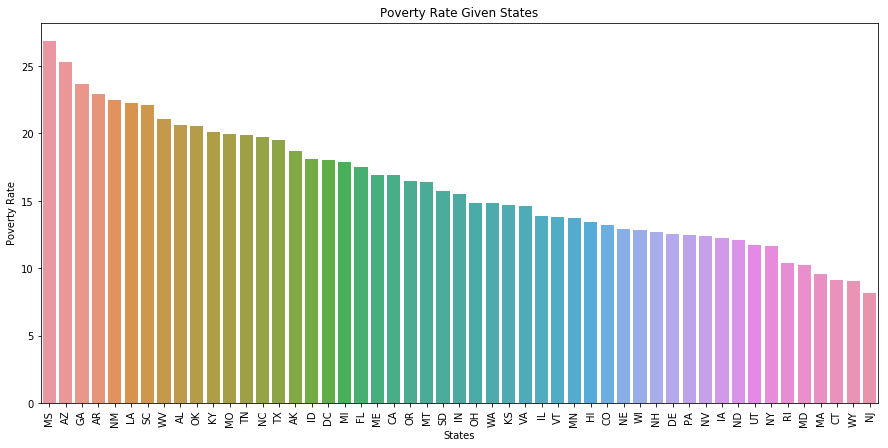

In [21]:
# impute missing
percentage_people_below_poverty_level.poverty_rate.replace(['-'], 0.0, inplace = True)
percentage_people_below_poverty_level.poverty_rate = percentage_people_below_poverty_level.poverty_rate.astype(float)
# calculate area wise poverty level
area_list = list(percentage_people_below_poverty_level['Geographic Area'].unique())
area_poverty_ratio = []
for i in area_list:
    x = percentage_people_below_poverty_level[percentage_people_below_poverty_level['Geographic Area']==i]
    area_poverty_rate = sum(x.poverty_rate)/len(x)
    area_poverty_ratio.append(area_poverty_rate)
data = pd.DataFrame({'area_list': area_list,'area_poverty_ratio':area_poverty_ratio})
# sort in descending order by poverty ration
new_index = (data['area_poverty_ratio'].sort_values(ascending=False)).index.values
sorted_data = data.reindex(new_index)
# plot a bar graph
plt.figure(figsize=(15,7))
ax= sns.barplot(x=sorted_data['area_list'], y=sorted_data['area_poverty_ratio'])
plt.xticks(rotation= 90)
plt.xlabel('States')
plt.ylabel('Poverty Rate')
plt.title('Poverty Rate Given States')

***
### 2. Count Plot: Kill Properties and Manner of Death

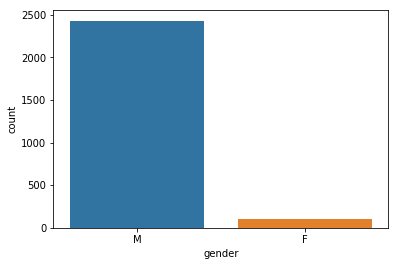

In [22]:
sns.countplot(kill.gender)

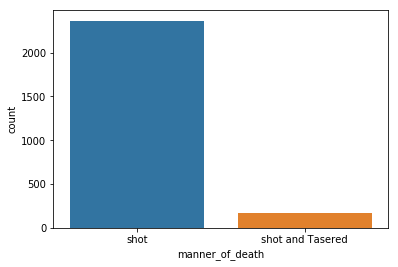

In [23]:
sns.countplot(kill.manner_of_death)

***
### 3. Line Chart: High school graduation rate vs Poverty rate of each state

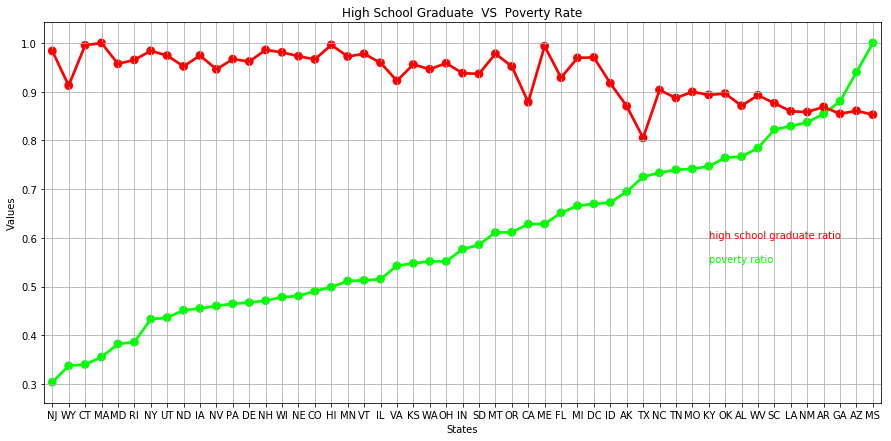

In [24]:
# High school graduation rate of the population that is older than 25 in states
percent_over_25_completed_highSchool.percent_completed_hs.replace(['-'],0.0,inplace = True)
percent_over_25_completed_highSchool.percent_completed_hs = percent_over_25_completed_highSchool.percent_completed_hs.astype(float)
area_list = list(percent_over_25_completed_highSchool['Geographic Area'].unique())
area_highschool = []
for i in area_list:
    x = percent_over_25_completed_highSchool[percent_over_25_completed_highSchool['Geographic Area']==i]
    area_highschool_rate = sum(x.percent_completed_hs)/len(x)
    area_highschool.append(area_highschool_rate)

data = pd.DataFrame({'area_list': area_list,'area_highschool_ratio':area_highschool})
new_index = (data['area_highschool_ratio'].sort_values(ascending=True)).index.values
sorted_data2 = data.reindex(new_index)
sorted_data['area_poverty_ratio'] = sorted_data['area_poverty_ratio']/max( sorted_data['area_poverty_ratio'])
sorted_data2['area_highschool_ratio'] = sorted_data2['area_highschool_ratio']/max( sorted_data2['area_highschool_ratio'])
data = pd.concat([sorted_data,sorted_data2['area_highschool_ratio']],axis=1)
data.sort_values('area_poverty_ratio',inplace=True)
f,ax1 = plt.subplots(figsize =(15,7))
sns.pointplot(x='area_list',y='area_poverty_ratio',data=data,color='lime',alpha=0.8,label = 'a')
sns.pointplot(x='area_list',y='area_highschool_ratio',data=data,color='red',alpha=0.8,label='b')
plt.text(40,0.6,'high school graduate ratio',color='red')
plt.text(40,0.55,'poverty ratio',color='lime')
plt.xlabel('States')
plt.ylabel('Values')
plt.title('High School Graduate  VS  Poverty Rate')
plt.grid()

***
### 4. Stacked Bar Chart: Percentage of state's population according to races that are black,white,native american, asian and hispanic

[Text(0,0.5,'States'),
 Text(0.5,0,'Percentage of Races'),
 Text(0.5,1,"Percentage of State's Population According to Races ")]

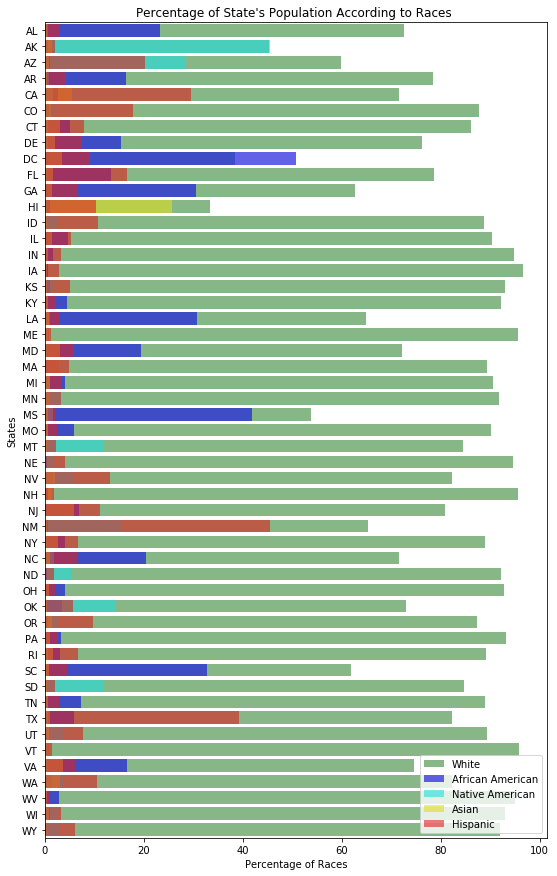

In [26]:
share_race_city.replace(['-'],0.0,inplace = True)
share_race_city.replace(['(X)'],0.0,inplace = True)
share_race_city.loc[:,['share_white','share_black','share_native_american','share_asian','share_hispanic']] = share_race_city.loc[:,['share_white','share_black','share_native_american','share_asian','share_hispanic']].astype(float)
area_list = list(share_race_city['Geographic area'].unique())
share_white = []
share_black = []
share_native_american = []
share_asian = []
share_hispanic = []
for i in area_list:
    x = share_race_city[share_race_city['Geographic area']==i]
    share_white.append(sum(x.share_white)/len(x))
    share_black.append(sum(x.share_black) / len(x))
    share_native_american.append(sum(x.share_native_american) / len(x))
    share_asian.append(sum(x.share_asian) / len(x))
    share_hispanic.append(sum(x.share_hispanic) / len(x))

f,ax = plt.subplots(figsize = (9,15))
sns.barplot(x=share_white,y=area_list,color='green',alpha = 0.5,label='White' )
sns.barplot(x=share_black,y=area_list,color='blue',alpha = 0.7,label='African American')
sns.barplot(x=share_native_american,y=area_list,color='cyan',alpha = 0.6,label='Native American')
sns.barplot(x=share_asian,y=area_list,color='yellow',alpha = 0.6,label='Asian')
sns.barplot(x=share_hispanic,y=area_list,color='red',alpha = 0.6,label='Hispanic')

ax.legend(loc='lower right',frameon = True)
ax.set(xlabel='Percentage of Races', ylabel='States',title = "Percentage of State's Population According to Races ")

***
### 5. Pie Chart: Race rates according to states in kill data 

Text(0.5,1,'Killed People According to Races')

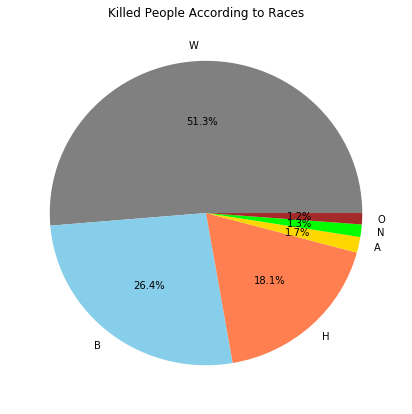

In [35]:
kill.race.dropna(inplace = True)
labels = kill.race.value_counts().index
colors = ['grey','skyblue','coral','gold','lime','brown']
explode = [0,0,0,0,0,0]
sizes = kill.race.value_counts().values
plt.figure(figsize=(7,7))
plt.pie(sizes, explode=explode, labels=labels, colors = colors, autopct='%1.1f%%')
plt.title('Killed People According to Races')

***
### 6. Scatter Plot

Text(3.8,0.5,'Column: y')

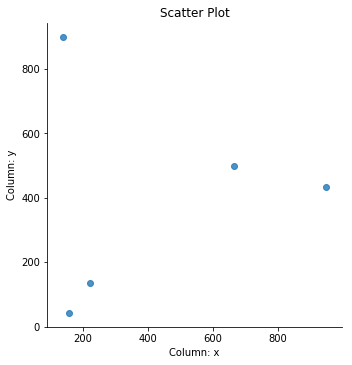

In [39]:
import random
# Create empty dataframe
df = pd.DataFrame()
# Add columns
df['x'] = random.sample(range(1, 1000), 5)
df['y'] = random.sample(range(1, 1000), 5)
df['z'] = [1,0,0,1,0]
df['k'] = ['male','male','male','female','female']
sns.lmplot('x', 'y', data = df, fit_reg = False)
plt.title('Scatter Plot')
plt.xlabel('Column: x')
plt.ylabel('Column: y')

***
### 7. Box Plot

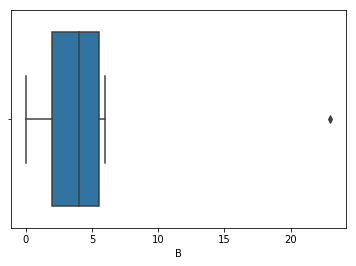

In [46]:
# Load the example tips dataset
data = pd.DataFrame({'A' : [1, 2, 3, 4, 3, 2, 4], 'B' : [0, 1, 5, 3, 23, 6, 4], 'Y' : [0, 0, 0, 0, 1, 1, 1]})

# Draw a nested boxplot to show bills by day and sex
sns.boxplot(x="B", data = data)

***
### 8. Histogram

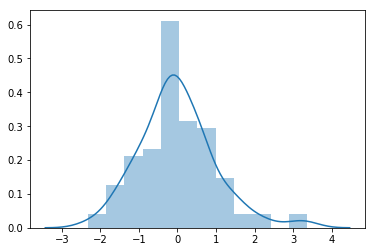

In [48]:
x = np.random.normal(size=100)
sns.distplot(x);

***
### 9. Correlation Matrix (heat map)

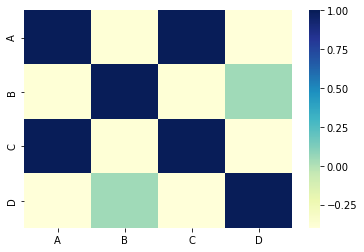

In [60]:
data = pd.DataFrame({'A' : range(10), 'B' : random.sample(range(0, 100), 10), 'C' : range(2, 12), 'D' : random.sample(range(-10, 100), 10)})
corr = data.corr()
sns.heatmap(corr, xticklabels = corr.columns.values, yticklabels = corr.columns.values, cmap="YlGnBu")

***
### 10. Pair Plot

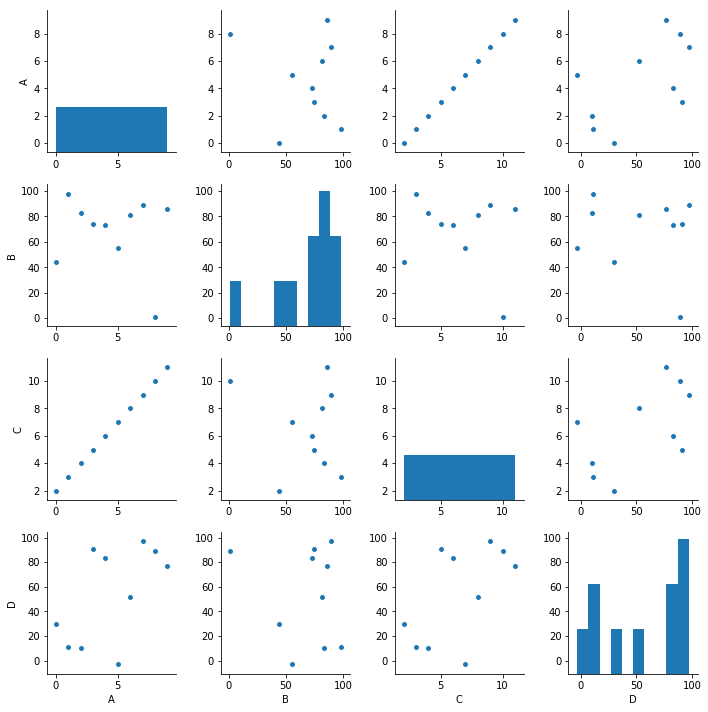

In [65]:
data = pd.DataFrame({'A' : range(10), 'B' : random.sample(range(0, 100), 10), 'C' : range(2, 12), 'D' : random.sample(range(-10, 100), 10)})
sns.pairplot(data)